In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('dataset_SCL.csv', delimiter=',') #Abrir el data set y convertir en dataframe

df.head(2)

/var/folders/rh/pzb5251126d2bpjgmyqp6q580000gn/T/ipykernel_96320/694923270.py:6: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_SCL.csv', delimiter=',') #Abrir el data set y convertir en dataframe


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami


# 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

**Conociendo el data set**

Puesto que no conozco el contenido de las variables del data set, se hace una pequeña exploración

In [2]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [3]:
#Te revisa el contenido de las carcateristcas

df.head(3).T

,0,1,2
Fecha-I,2017-01-01 23:30:00,2017-01-02 23:30:00,2017-01-03 23:30:00
Vlo-I,226,226,226
Ori-I,SCEL,SCEL,SCEL
Des-I,KMIA,KMIA,KMIA
Emp-I,AAL,AAL,AAL
Fecha-O,2017-01-01 23:33:00,2017-01-02 23:39:00,2017-01-03 23:39:00
Vlo-O,226,226,226
Ori-O,SCEL,SCEL,SCEL
Des-O,KMIA,KMIA,KMIA
Emp-O,AAL,AAL,AAL


In [4]:
print(df.shape)

(68206, 18)


descripción de las columnas del data set

In [5]:
df_dict = pd.read_csv('diccionario.csv', delimiter=',') # se abre el diccionario de datos


df_dict.head(2)

,features,description,Unnamed: 2,Unnamed: 3
0,Fecha-I,Fecha y hora programada del vuelo.,NaN,NaN
1,Vlo-I,Número de vuelo programado.,NaN,NaN


In [6]:
flies_dtypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
flies_dtypes = flies_dtypes.reset_index()
flies_dtypes['name'] = flies_dtypes['index']
flies_dtypes = flies_dtypes[['name','dtypes']]
flies_dtypes['first value'] = df.loc[0].values

**Extrayendo diccionario de datos**

In [7]:
#Dado que vienen un par de campos sin nombre, se procede a renombrar
#Estos campos dicen relación con los valores de las varaibles categoricas
#Particularmente la variable TIPO VUELO
df_dict.rename(columns={"Unnamed: 2": "Valor1", "Unnamed: 3": "Valor2"}, inplace=True)
df_dict

,features,description,Valor1,Valor2
0,Fecha-I,Fecha y hora programada del vuelo.,NaN,NaN
1,Vlo-I,Número de vuelo programado.,NaN,NaN
2,Ori-I,Código de ciudad de origen programado.,NaN,NaN
3,Des-I,Código de ciudad de destino programado.,NaN,NaN
4,Emp-I,Código aerolínea de vuelo programado.,NaN,NaN
5,Fecha-O,Fecha y hora de operación del vuelo.,NaN,NaN
6,Vlo-O,Número de vuelo de operación del vuelo.,NaN,NaN
7,Ori-O,Código de ciudad de origen de operación,NaN,NaN
8,Des-O,Código de ciudad de destino de operación.,NaN,NaN
9,Emp-O,Código aerolínea de vuelo operado.,NaN,NaN


se renombra la columna features proveniente del diccionario, para que al cruzar flies_dtypes con df_dict no se duplique la columna con el nombre de las caracteristicas

se crea una data frame con el resumen de todas las variables y su contenido, de tal manera se tiene una mejor comprension de los datos que fueron entregados

In [8]:
df_dict.rename(columns={"features": "name",}, inplace=True)
preview = flies_dtypes.merge(df_dict, on='name', how='left')
preview

,name,dtypes,first value,description,Valor1,Valor2
0,Fecha-I,object,2017-01-01 23:30:00,Fecha y hora programada del vuelo.,NaN,NaN
1,Vlo-I,object,226,Número de vuelo programado.,NaN,NaN
2,Ori-I,object,SCEL,Código de ciudad de origen programado.,NaN,NaN
3,Des-I,object,KMIA,Código de ciudad de destino programado.,NaN,NaN
4,Emp-I,object,AAL,Código aerolínea de vuelo programado.,NaN,NaN
5,Fecha-O,object,2017-01-01 23:33:00,Fecha y hora de operación del vuelo.,NaN,NaN
6,Vlo-O,object,226,Número de vuelo de operación del vuelo.,NaN,NaN
7,Ori-O,object,SCEL,Código de ciudad de origen de operación,NaN,NaN
8,Des-O,object,KMIA,Código de ciudad de destino de operación.,NaN,NaN
9,Emp-O,object,AAL,Código aerolínea de vuelo operado.,NaN,NaN


donde:
* **names**:Nombre de la caracteristica
* **dtypes**:tipo de dato de la caracteristica
* **first value**:primer valor del data set
* **description**: descripción de la variable
* **valor1**:primer valor del data set en caso de ser categorica
* **valor2**:segundo valor del data set en caso de ser categorica

Para cualquier operación con fechas es necesario que los campos tengan el formato adecuado (datetime). Por lo que se procede a convertir el formato

In [9]:
df["Fecha-I"] = pd.to_datetime(df["Fecha-I"])
df["Fecha-O"] = pd.to_datetime(df["Fecha-O"])
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [10]:
print('la primera fecha del dataset es', df["Fecha-I"].min())
print('la última fecha del dataset es', df["Fecha-I"].max())

la primera fecha del dataset es 2017-01-01 00:15:00
la última fecha del dataset es 2017-12-31 23:55:00


Se comprueba que los tipos de datos sean los correctos

In [11]:
df.dtypes

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object

In [12]:
print(df.isnull().sum())

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64


Solo se observa un valor nulo en la variable "Fecha-O"

**Analsis de la data**

una vez que se tiene más claro el contenido del data set, se procede revisar distribuciones

Al revisar el data set fue posible identificar que la mayoria de las variables son categoricas, por lo cual se hace una pequeña revisión del contenido de estas

In [13]:
cols = ['Vlo-I', 'Ori-I','Des-I', 'Emp-I', 'Vlo-O', 'Ori-O','Des-O', 'Emp-O', 'TIPOVUELO', 'DIANOM','OPERA', 'SIGLAORI', 'SIGLADES']
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

Vlo-I :
174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64 

Ori-I :
SCEL    68206
Name: Ori-I, dtype: int64 

Des-I :
SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64 

Emp-I :
LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      358
DAL      358
AMX      351
UAL      335
ONE      279
AZA      259
KLM      251
LAP      216
BAW      205
QFU      195
JMR      100
LRC       92
AUT       74
PUE       49
LXP        9
LPE        4
DSM        2
LNE        1
Name: Emp-I, dtype: int64 

Vlo-O :
174      649
11       646
116      608
150      517
704      514
        ... 
356        1
1148       1
846A       1
4950       1
180.0      1
N

Lo primero que puedo notar esta información es que:

* Se observa una gran diferencia en la cantidad de vuelos programados de algunas aerlos y su disminución en la operación.
* Existe una proporción similar entre vuelos nacionales e internacionales
* La distribución de viajes diarios es bastante similar.
* Los viajes nacionales se concentran donde existe una alta actividad economica como producción de cobre en el norte
* Los viajes internacionales se concentran más en los paises más cercanos.

Se estudiará en mas detalle el porque del cambio tan abrupto de aerolineas que programan versus las que operan.

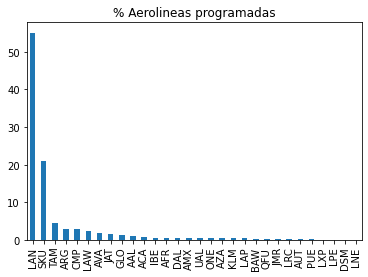

In [14]:
# gráfico de barras de frecuencias relativas.

plot = (100*df['Emp-I'].value_counts()/len(df['Emp-I'])).plot(kind='bar', title='% Aerolineas programadas')

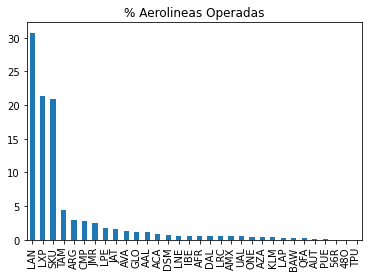

In [15]:
plot2=(100*df['Emp-O'].value_counts()/len(df['Emp-O'])).plot(kind='bar', title='% Aerolineas Operadas')

En general se mantiene la tendencia de que las aerolines que mas programan son las que mas operan, también es destacable que existen códigos de aerolineas que tenian muy baja participación en cuanto a programación y luego adquieren mayor relevancia en la operación, como por ejemplo LXP y JMR. 

Se puede observar que LAN disminuye cerca de un 20% en la participación de aerolineas que operan, cuya particación es absrovida por LXP.

In [16]:
print(df['OPERA'][df['Emp-O']=='LXP'].head(1))
print(df['OPERA'][df['Emp-O']=='JMR'].head(1))

3334    Grupo LATAM
Name: OPERA, dtype: object
6069    Latin American Wings
Name: OPERA, dtype: object


Al revisar cuales son estas aerolines, aparentemente se tratan de aerolineas que cubren las operaciones de otras.

**A modo de hipotesis**, es posible que haya una relación directa entre el cambio de los itinerarios de los vuelos programados.

Suponiendo que el atraso de un vuelo se refleja en el cambio de hora y esto es sabido luego de conocer los nuevos itinerarios de los vuelos.

In [17]:
df['cambio_vuelo']=np.where(df['Vlo-I']==df['Vlo-O'],0,1)
df['cambio_Destino']=np.where(df['Des-I']==df['Des-O'],0,1)
df['cambio_emp']=np.where(df['Emp-I']==df['Emp-O'],0,1)

In [18]:
df['cambio_vuelo'].value_counts()

0    66356
1     1850
Name: cambio_vuelo, dtype: int64

In [19]:
df['cambio_Destino'].value_counts()

0    68178
1       28
Name: cambio_Destino, dtype: int64

In [20]:
df['cambio_emp'].value_counts()

0    49537
1    18669
Name: cambio_emp, dtype: int64

El cambio más significativo es el del código de la aerolinea preagada.

Ahora se revisa la proporción entre vuelos progamados que luego son operados por otra aerolinea

In [21]:
df_res = df.groupby('Emp-I').agg({'Emp-I': 'count',
                                  'cambio_emp': 'sum'})

df_res['prop']=(df_res['cambio_emp']/df_res['Emp-I']).sort_values(ascending = True)

In [22]:
df_res.sort_values(by='prop', ascending = False)

,Emp-I,cambio_emp,prop
Emp-I,,,
QFU,195,195,1.000000
LAW,1574,1574,1.000000
LAN,37611,16623,0.441972
AVA,1152,267,0.231771
AUT,74,2,0.027027
ARG,1949,5,0.002565
TAM,3049,3,0.000984
AAL,757,0,0.000000
SKU,14298,0,0.000000


Lo mas destacable es que existen aerolineas que todos sus vuelos programados cambian en la operación, como lo es QFU y LAW.

Como se mensiono anteriormente LAN tambien cambia bastante

A continuación se revisa como se distribuyen las operaciones de los vuelos programados

In [23]:
pd.crosstab(df['Emp-I'][df['Emp-I']=='QFU'], df['Emp-O'][df['Emp-I']=='QFU'])

Emp-O,QFA
Emp-I,
QFU,195


In [24]:
pd.crosstab(df['Emp-I'][df['Emp-I']=='LAW'], df['Emp-O'][df['Emp-I']=='LAW'])

Emp-O,48O,56R,JMR
Emp-I,,,
LAW,10,17,1547


In [25]:
pd.crosstab(df['Emp-I'][df['Emp-I']=='LAN'], df['Emp-O'][df['Emp-I']=='LAN'])

Emp-O,DSM,LAN,LNE,LPE,LXP
Emp-I,,,,,
LAN,491,20988,373,1210,14549


In [26]:
pd.crosstab(df['Emp-I'][df['Emp-I']=='AVA'], df['Emp-O'][df['Emp-I']=='AVA'])

Emp-O,AVA,LRC,TPU
Emp-I,,,
AVA,885,265,2
